## 5.10 mit der Crank-Nicolson Finiten-Differenzen-Methode zur Lösung der Wärmeleitungsgleichung.
Hier wird die Aufgabe mit dem impliziten Finiten-Differenzschema nach Crank-Nicolson gelöst. Diese Methode hat viele Anwendungen zur numerischen Lösung der partiellen parabolischen Differentialgleichung, weil sie ein mathematisch stabiles Verfahren bietet, das auch bei Verwendung unterschiedlichster Zeitschritte anwendbar ist.\
Die hier verwendete Gleichung ist in Philpotts & Ague auf Seite 120 hergeleitet. 

Das Beispiel hier beschreibt die Berechnung der Temperaturen zu verschiedenen Zeiten t nach dem Ausfluß des Magmas in einen Lavasee. Die Temperatur an der Oberfläche sei 25°C zu allen Zeiten t. Die Berechnung der Temperaturen zu verschiedenen Zeiten ist iterativ, d.h. sie erfolgt auf der Basis der in der vorgehenden Iteration berechneten Temperaturen.
Zuletzt werden die Temperaturkurven in ein Diagramm geplottet.

[Download Python Code](5-10CN-cooling_of_lava_lake.py)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Set the global print number format
float_formatter = "{:.0f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [6]:
k = 1E-6
To = 1200.   # adjusted initial Temperature  it is T[1]
dt = 1800    # seconds
dz = 0.0424    # the parameters dt, k and dz result in k*dt/dz**2 = 1, thus are not used in the calculations
dsteps = 16
tsteps = 12
zEnd = dsteps*dz
depth = np.arange(0, zEnd, dz)
T = np.full([dsteps, tsteps], To)
T[0, :] = 25.

count = 0
while count < 5:
    count += 1
    for n in range(1, tsteps-1):
        for m in range(1, dsteps-1):
            # Time n   Depth m
            T[m][n+1] = .25 * (T[m+1][n]+T[m-1][n]+T[m+1][n+1]+T[m-1][n+1])
print(T)

[[25 25 25 25 25 25 25 25 25 25 25 25]
 [1200 1200 570 473 394 351 320 298 283 271 262 256]
 [1200 1200 1031 811 712 636 585 546 517 495 479 466]
 [1200 1200 1155 1044 936 861 800 753 717 688 666 649]
 [1200 1200 1188 1144 1078 1014 959 913 875 844 820 800]
 [1200 1200 1197 1181 1149 1108 1066 1028 994 964 940 920]
 [1200 1200 1199 1194 1180 1158 1131 1103 1076 1051 1029 1011]
 [1200 1200 1200 1198 1193 1182 1167 1149 1129 1111 1093 1077]
 [1200 1200 1200 1199 1197 1193 1185 1174 1162 1149 1136 1123]
 [1200 1200 1200 1200 1199 1197 1194 1188 1181 1172 1163 1154]
 [1200 1200 1200 1200 1200 1199 1197 1195 1191 1185 1179 1173]
 [1200 1200 1200 1200 1200 1200 1199 1198 1196 1193 1189 1185]
 [1200 1200 1200 1200 1200 1200 1200 1199 1198 1197 1194 1192]
 [1200 1200 1200 1200 1200 1200 1200 1200 1199 1198 1197 1196]
 [1200 1200 1200 1200 1200 1200 1200 1200 1200 1199 1199 1198]
 [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]]


Im letzten Teil werden die berechneten Daten in ein Diagramm geplottet.

12
24
36
48
60
72
84
96
108
120
132


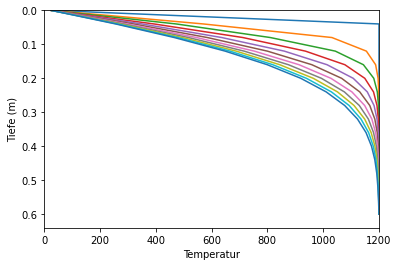

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlim(0, To)
ax1.set_ylim(0, zEnd)
ax1.set_xlabel("Temperatur")
ax1.set_ylabel("Tiefe (m)")

for j in range(1, tsteps):
    ax1.plot(T[:, j], depth)
    print(tsteps*j)

# ax1.plot(T[:, 3], depth, 'o',  xnew, ynew, '--' )

plt.gca().invert_yaxis()
plt.show()